# k-Nearest Neighbour Classifier

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [2]:
file_path = 'simple_model_results/knn.json'
search_output = json.load(open(file_path))

In [11]:
x = []
y_test = []
y_train = []
for k, v in search_output['results']['params'].items():
    x.append(v['n_neighbors'])
    y_test.append(search_output['results']['mean_test_score'][k])
    y_train.append(search_output['results']['mean_train_score'][k])

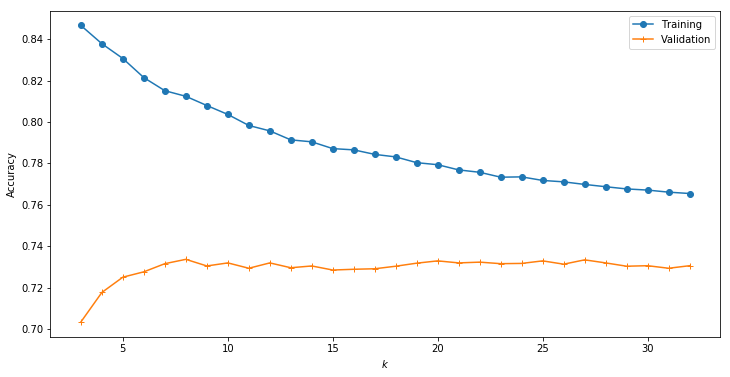

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, y_train, 'o-', label='Training')
ax.plot(x, y_test, '-+', label='Validation')
ax.set_xlabel('$k$')
ax.set_ylabel('Accuracy')
ax.legend()

In [21]:
search_output['best_params']

{'n_neighbors': 8}

In [22]:
search_output['best_score']

0.733636811023622

On Kaggle, the accuracy is 0.68670